# PCA on Faces Dataset

## Yanling Wu (yw996)

In this assignment, we will use PCA for dimensionality reduction on the MIT Face Recognition Dataset (https://courses.media.mit.edu/2004fall/mas622j/04.projects/faces/). The following code collects images from the folder rawdata and stores them in a 128x128x(number of images) tensor - image_collection. Running this might take about 20 minutes. If it takes more for you, you can break the loop after 1000 images.


In [1]:
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

directory = os.fsencode('rawdata/')
image_collection = np.zeros((128,128,1))
count=0
for file in os.listdir(directory):
    count= count+1
    filename = os.fsdecode(file)
    temp_image = np.fromfile('rawdata/'+filename, dtype='uint8', sep="")
    ratio = temp_image.shape[0]/16384
    if ratio>1:
        temp_image = np.reshape(temp_image, (128*int(np.sqrt(ratio)), 128*int(np.sqrt(ratio))))
        temp_image = block_reduce(temp_image, (int(np.sqrt(ratio)),int(np.sqrt(ratio))), np.mean)
    image_collection = np.concatenate((image_collection,np.reshape(temp_image,(128,128,1))),axis=2)
    #if count==1000:
    #    break
image_collection = image_collection[:,:,1:]

# Problem 1

Recall that PCA requires centered data(zero mean). Center image_collection and display the mean image in gray scale using matplotlib

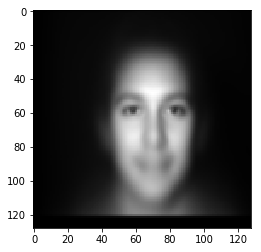

In [8]:
#========Your code here ======

X_trn = np.reshape(image_collection.T, (image_collection.shape[2], 128**2))
mean_image = np.mean(image_collection, axis=2)
X_trn_new = X_trn - mean_image.reshape(128**2)
mean_image = np.reshape(mean_image, (128,128,))
plt.imshow(mean_image, cmap='gray')

#==============================
plt.show()

# Problem 2

Perform PCA on the images using sklearn. Plot the total percentage of variance explained versus number of components. Also plot the minimum percentage of variance explained versus number of components. Finally plot the singular values when number of components is 500. Justify the plots.

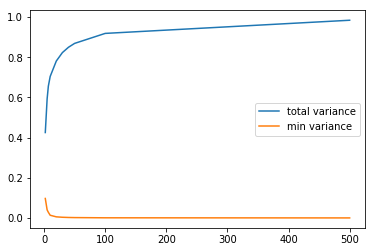

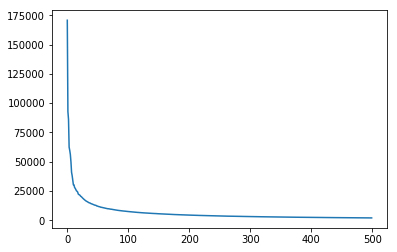

In [27]:
num_comp = [2,5,7,10,20,30,40,50,100,500]
#========Your code here ======
from sklearn.decomposition import PCA
total_variance_explained = np.zeros(len(num_comp))
min_variance = np.zeros(len(num_comp))

for i in range(len(num_comp)):
    pca = PCA(n_components=num_comp[i],svd_solver='full')
    pca.fit(X_trn_new)
    total_variance_explained[i] = np.sum(pca.explained_variance_ratio_)
    min_variance[i] = np.min(pca.explained_variance_ratio_)
    if num_comp[i] == 500:
        singular_values = pca.singular_values_

#==============================
plt.figure(1)
plt.plot(num_comp,total_variance_explained,label='total variance')
plt.plot(num_comp, min_variance,label = 'min variance')
plt.legend()
plt.show()
plt.figure(2)
plt.plot(range(500),singular_values)
plt.show()

## Explanation
- Pricipal Component Analysis(PCA) is a dimension reduction algorith, which can convert a set of possibly related variances to a set of values of linearly uncorrelated variables. By this way, it could reduces the data dimension and project it to a lower dimensional space. 


- From the first graph, the total variance has the lowest variance perventage and the highest minimum variance when the number of components is equal to 2. It suggests that low number of components cannot keep the linearity of the data after PCA. On the other hand, the total variance is graduately close to 1.0 and minimum percentage of variance explained decreases quickly, which might indicate that more data preserved linearly. 


- The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space. As shown in the singular values graph, the first several components hace the high values which means that the data would be preserved the most information when projecting on the first compnents. 

# Problem 3

Display the first 5 principal components as images in gray scale using matplotlib. Explain your observations.

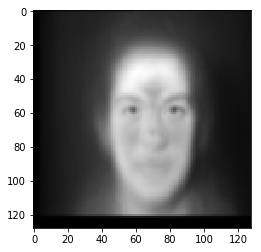

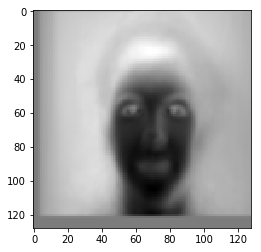

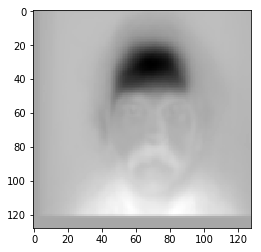

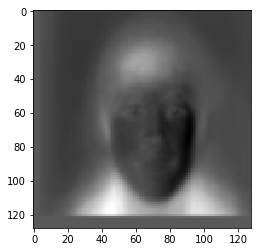

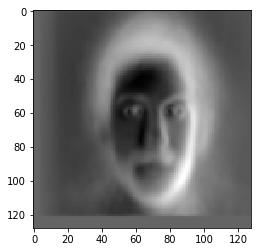

In [28]:
#========Your code here ======

num_comp = 100

pca = PCA(n_components=num_comp)
pca.fit(X_trn_new)

for i in range(5):
    plt.figure(i)
    plt.imshow(pca.components_[i,:].reshape(128,128).T,cmap= plt.cm.gray)

#==============================

## Explanation
- What I used to generate the images is `pca.components_`. The attribution of `components_` is principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by `explained_variance_`. The first picture is the one with the highest explained variance wihch means it keeps the most part of characteristics and that is why we could see the main characteristics of this boy from the first picture and this picture was not changed so much. 


- The background brightness could indicate how different cluster data sets would look like. 


- The areas around the mouth of these five pictures are very different. We could see a moustache-like area from the middle and the last images. Because the boy is smiling and maybe the more he smiles, the more contrast would be obvious, which means the more moustache he will have. 

Project the data matrix on the first two principal components and plot a scatter plot of the dataset

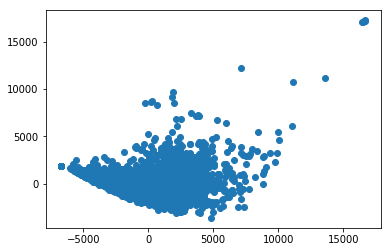

In [29]:
#========Your code here ======
projection = pca.transform(X_trn_new)

#==============================
plt.scatter(projection[:,0], projection[:,1])
plt.show()